In [58]:
import pandas as pd

# Load the dataset
file_path = "Iris.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


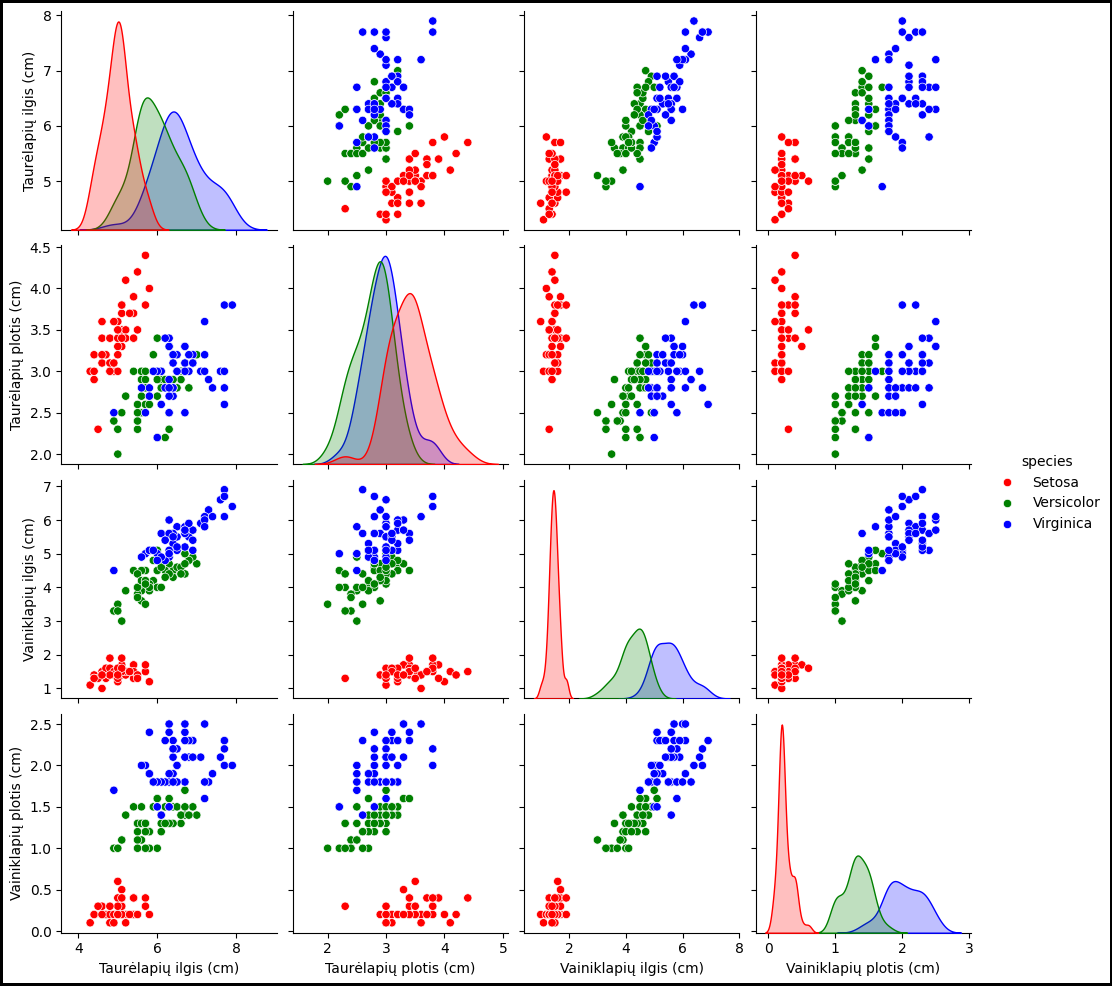

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.patches as patches

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map species labels to actual names
species_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_names)

# Translate column names to Lithuanian
df = df.rename(columns={
    "sepal length (cm)": "Taurėlapių ilgis (cm)",
    "sepal width (cm)": "Taurėlapių plotis (cm)",
    "petal length (cm)": "Vainiklapių ilgis (cm)",
    "petal width (cm)": "Vainiklapių plotis (cm)"
})

# Create pair plot with Lithuanian labels
pairplot = sns.pairplot(df, hue="species", palette={"Setosa": "red", "Versicolor": "green", "Virginica": "blue"}, markers="o")

# Add a rectangular border around the entire figure
fig = pairplot.fig
fig.patch.set_linewidth(3)  # Set border width
fig.patch.set_edgecolor('black')  # Set border color

# Save the figure with an outline
pairplot.savefig("iris_pairplot_with_border.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


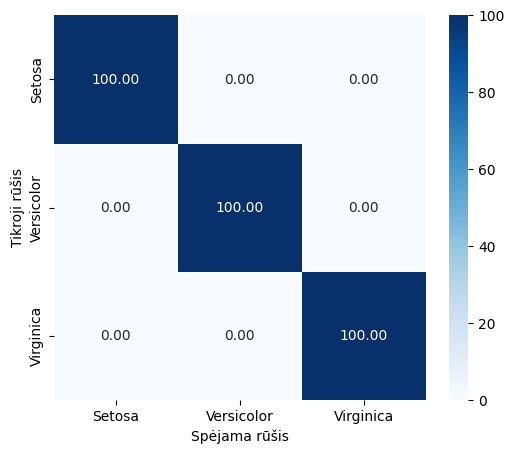

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map species labels to actual names
species_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_names)

# Prepare the data
X = df.drop(columns=["species"])
y = df["species"]

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2, stratify=y_encoded)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.show()


In [61]:
# Verify column names
print(df.columns)

# Check unique values in the species column
print(df["species"].unique())

# Create a class imbalance: 50 samples of 'Setosa', 50 of 'Virginica', and 30 of 'Versicolor'
setosa_indices = df[df["species"] == "Setosa"].index[:50]
versicolor_indices = df[df["species"] == "Versicolor"].index[:30]
virginica_indices = df[df["species"] == "Virginica"].index[:50]

# Create the imbalanced dataset
imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

# Prepare the new imbalanced dataset
X_imbalanced = imbalanced_df.drop(columns=["species"])  # Ensure the correct column name
y_imbalanced = imbalanced_df["species"]

# Encode the target variable
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

# Split into training and testing sets
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=999, stratify=y_imbalanced_encoded
)

# Standardize features
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_scaled = scaler.transform(X_test_imbalanced)

# Train the MLP Classifier on the imbalanced dataset
mlp_imbalanced = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=2)
mlp_imbalanced.fit(X_train_imbalanced_scaled, y_train_imbalanced)

# Make predictions
y_pred_imbalanced = mlp_imbalanced.predict(X_test_imbalanced_scaled)

# Evaluate the model
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
classification_rep_imbalanced = classification_report(y_test_imbalanced, y_pred_imbalanced, target_names=encoder.classes_)

print("Accuracy:", accuracy_imbalanced)
print("\nClassification Report:\n", classification_rep_imbalanced)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
['Setosa' 'Versicolor' 'Virginica']
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



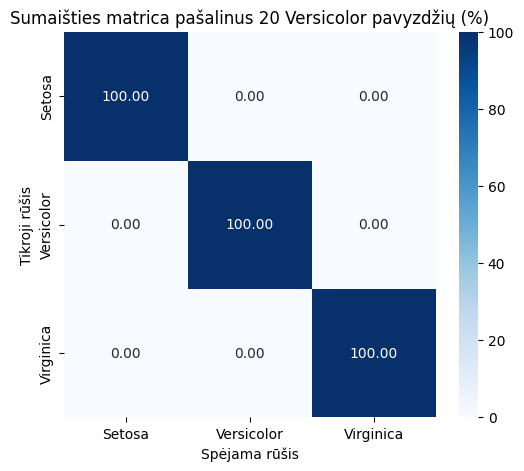

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 20 Versicolor pavyzdžių (%)")
plt.show()
